In [209]:
from pandas import read_csv, DataFrame, Series
import matplotlib.pyplot as plt

In [210]:
df = read_csv('hmeq.csv')


In [211]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


### Data analysis
Check shape, not-null count, dtype detected by pandas and dtype deduction, enum values, a few hypotheses
#### Column `YOJ`

In [212]:
# Null values on YOJ, JOB, DEBTINC may mean unemployment

df[df['YOJ'] == 0][['YOJ', 'JOB', 'DEBTINC']]

,YOJ,JOB,DEBTINC
92,0.0,NaN,NaN
99,0.0,Other,33.840920
118,0.0,NaN,11.652739
203,0.0,Other,NaN
205,0.0,Other,38.766985
...,...,...,...
5642,0.0,Other,1.028931
5663,0.0,Other,NaN
5803,0.0,Other,NaN
5826,0.0,Other,3.342570


- Zero years at job doesn't mean debt to income ratio is null, meaning 0 years at job doesn't mean unemployed
- A null value as the occupational category `job` doesn't mean the person is unemployed, as they have a populated debit to income ratio
- Null values may have been added by the data provider as a way to alter the data randomly as to not reflect reality too closely

#### Column `Delinq`

In [213]:
df['DELINQ'].value_counts()

DELINQ
0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: count, dtype: int64

`int` as `float`
#### Column `DEROG`

In [214]:
df['DEROG'].value_counts()

DEROG
0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: count, dtype: int64

`int` as `float`
### Missing values

In [215]:
notna = df.notna()
infodf = DataFrame({
    'Column': df.columns,
    'Not-null count': [notna[c].sum() for c in df.columns],
    'Dtype': [df[c].dtype for c in df.columns]
})

infodf.set_index('Column')

,Not-null count,Dtype
Column,,
BAD,5960,int64
LOAN,5960,int64
MORTDUE,5442,float64
VALUE,5848,float64
REASON,5708,object
JOB,5681,object
YOJ,5445,float64
DEROG,5252,float64
DELINQ,5380,float64


All columns except `BAD`,`LOAN` have null values.
#### Column `MORTDUE`

In [216]:
# Are there null values and 0 values at the same time?
df[df['MORTDUE'] == 0]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


There are no "mortdue = 0" cells, meaning a null value may be mean "0", or no amount due on existing mortgage

In [217]:
df.loc[df['MORTDUE'].isna(), 'MORTDUE'] = 0 # it is fair to assume that a null mortdue is 0

#### Rest of columns
Deal with missing values in a straight-forward way

In [218]:
f = df.dropna().copy()

df.size, f.size # was 43732 before imputing MORTDUE, now is 45890

(77480, 45890)

A significant chunk of the data is gone, but the amount of rows is still big and we won't have to imputate, therefore the data will stay more true and accurate

In [219]:
# show statistical properties of dataset without any null value
f.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,3530.0,0.088952,0.284715,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,3530.0,19206.232295,10985.042548,1700.000000,11900.000000,17000.000000,23900.000000,89900.000000
MORTDUE,3530.0,72663.945326,46888.783860,0.000000,46603.000000,64900.500000,90809.250000,399412.000000
VALUE,3530.0,106094.742493,58782.336642,11702.000000,69861.000000,92919.500000,121176.750000,855909.000000
YOJ,3530.0,9.102833,7.645549,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,3530.0,0.143343,0.569726,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,3530.0,0.267705,0.794216,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,3530.0,181.468757,83.819930,0.486711,118.459054,176.331519,231.876088,1168.233561
NINQ,3530.0,1.024646,1.531834,0.000000,0.000000,1.000000,2.000000,13.000000
CLNO,3530.0,21.744759,9.453995,0.000000,15.000000,21.000000,27.000000,64.000000


In [220]:
# Show statistical properties of dataset with null values (null values are skipped)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5960.0,67350.061611,47291.714068,0.000000,38996.500000,61739.500000,88200.250000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [221]:
f.mode().iloc[0]  # for the form's placeholders

BAD             0.0
LOAN        11000.0
MORTDUE         0.0
VALUE       41396.0
REASON      DebtCon
JOB           Other
YOJ             0.0
DEROG           0.0
DELINQ          0.0
CLAGE      0.486711
NINQ            0.0
CLNO           16.0
DEBTINC    0.838118
Name: 0, dtype: object

In [222]:
f['DELINQ'].value_counts()

DELINQ
0.0     2985
1.0      328
2.0      124
3.0       51
4.0       21
6.0        7
7.0        6
5.0        6
8.0        1
10.0       1
Name: count, dtype: int64

### Datatype manipulation
Cast columns to proper datatypes according to their observed properties

In [223]:
f['MORTDUE'] = f['MORTDUE'].astype(int)
f['VALUE'] = f['VALUE'].astype(int)
f['YOJ'] = f['YOJ'].astype(int)
f['NINQ'] = f['NINQ'].astype(int)
f['CLNO'] = f['CLNO'].astype(int)
f['DEROG'] = f['DEROG'].astype(int)
f['DELINQ'] = f['DELINQ'].astype(int)

f['BAD'] = f['BAD'].astype(bool)

f

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,True,1700,30548,40320,HomeImp,Other,9,0,0,101.466002,1,8,37.113614
7,True,1800,28502,43034,HomeImp,Other,11,0,0,88.766030,0,8,36.884894
19,False,2300,102370,120953,HomeImp,Office,2,0,0,90.992533,0,13,31.588503
25,True,2400,34863,47471,HomeImp,Mgr,12,0,0,70.491080,1,21,38.263601
26,False,2400,98449,117195,HomeImp,Office,4,0,0,93.811775,0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,88900,57264,90185,DebtCon,Other,16,0,0,221.808718,0,16,36.112347
5956,False,89000,54576,92937,DebtCon,Other,16,0,0,208.692070,0,15,35.859971
5957,False,89200,54045,92924,DebtCon,Other,15,0,0,212.279697,0,15,35.556590
5958,False,89800,50370,91861,DebtCon,Other,14,0,0,213.892709,0,16,34.340882


### Outliers
Detect outliers

In [224]:
def outlier_bounds(col: Series):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


def outlier(col: Series):
    l, u = outlier_bounds(f['MORTDUE'])
    return (col < l) | (col > u)

#### Mortdue column

In [225]:
outliers = f[outlier(f['MORTDUE'])]
outliers

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
414,True,6500,183860,208910,DebtCon,ProfExe,4,6,0,86.452227,6,29,69.800525
1684,False,11900,201264,227295,HomeImp,ProfExe,10,0,0,239.743366,0,22,33.776337
1801,False,12200,206613,232176,HomeImp,ProfExe,10,0,1,237.315770,0,22,30.689439
1804,False,12200,199232,229929,HomeImp,ProfExe,11,0,0,223.438117,0,21,31.370272
1851,False,12400,203902,234454,HomeImp,ProfExe,9,0,0,213.455447,0,22,33.648521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,False,69700,191972,294367,DebtCon,Self,10,0,0,230.705613,2,25,28.201871
5926,False,70300,197761,294169,DebtCon,Self,9,0,0,212.239725,2,24,28.907073
5927,False,70500,196690,288512,DebtCon,Self,9,0,0,227.027136,2,24,29.582301
5928,False,70800,192044,292380,DebtCon,Self,10,0,0,221.608486,2,25,30.378548


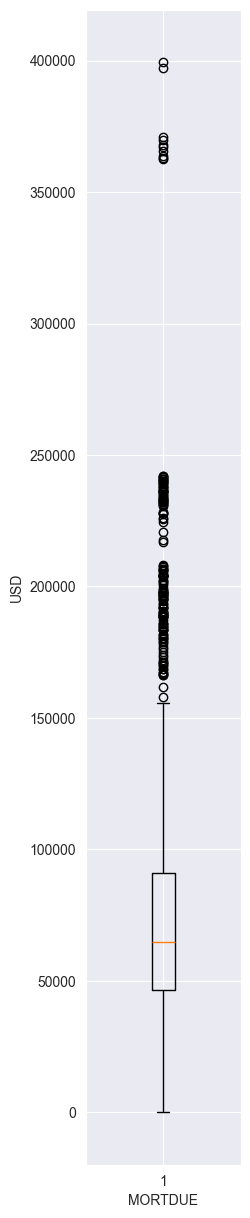

In [226]:
plt.figure(figsize=(2, 15))
plt.boxplot(f['MORTDUE'])
plt.xlabel('MORTDUE')
plt.ylabel('USD')
plt.show()

There are 139 outlier rows for `MORTDUE`. Contained within 2 clusters.
#### Value column

In [227]:
outliers = f[outlier(f['VALUE'])]
outliers

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
59,True,3300,130518,164317,DebtCon,Other,9,0,6,192.289149,0,33,35.730559
414,True,6500,183860,208910,DebtCon,ProfExe,4,6,0,86.452227,6,29,69.800525
440,False,6800,136951,160306,HomeImp,ProfExe,11,0,0,219.735673,1,18,20.885093
441,False,6800,138691,160063,HomeImp,ProfExe,12,0,0,208.420843,0,19,19.333367
503,False,7000,129959,161301,HomeImp,ProfExe,11,0,0,209.986300,0,18,21.917952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,False,70300,197761,294169,DebtCon,Self,9,0,0,212.239725,2,24,28.907073
5927,False,70500,196690,288512,DebtCon,Self,9,0,0,227.027136,2,24,29.582301
5928,False,70800,192044,292380,DebtCon,Self,10,0,0,221.608486,2,25,30.378548
5929,False,71200,196601,289430,DebtCon,Self,12,0,0,226.914307,2,25,29.220351


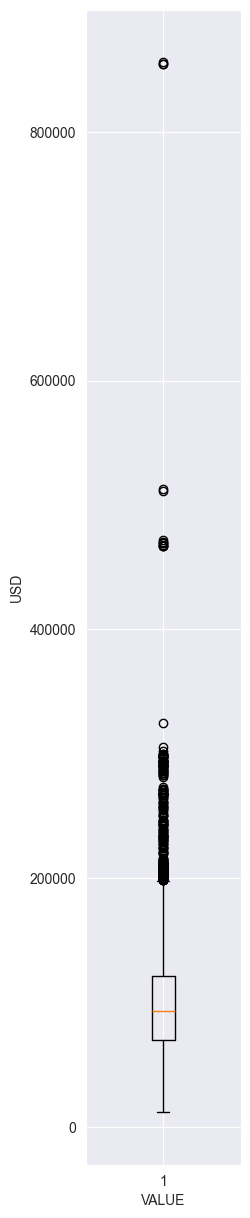

In [228]:
plt.figure(figsize=(2, 15))
plt.boxplot(f['VALUE'])
plt.xlabel('VALUE')
plt.ylabel('USD')
plt.show()

There are 503 outlier rows for `VALUE`. Contained within 3 clusters.

#### Loan column

In [229]:
f[outlier(f['LOAN'])]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


No outliers for `LOAN`

#### YOJ column

In [230]:
f[outlier(f['YOJ'])]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


No outliers for `YOJ`

#### CLAGE column

In [231]:
f[outlier(f['CLAGE'])]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


No outliers for `CLAGE`

#### Debtinc column

In [232]:
f[outlier(f['DEBTINC'])]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


No outliers for `DEBTINC`

Though a few outliers were detected, no action will be taken as these are rows may reflect reality closely and an instrument mishap is unlikely

### Visualisation

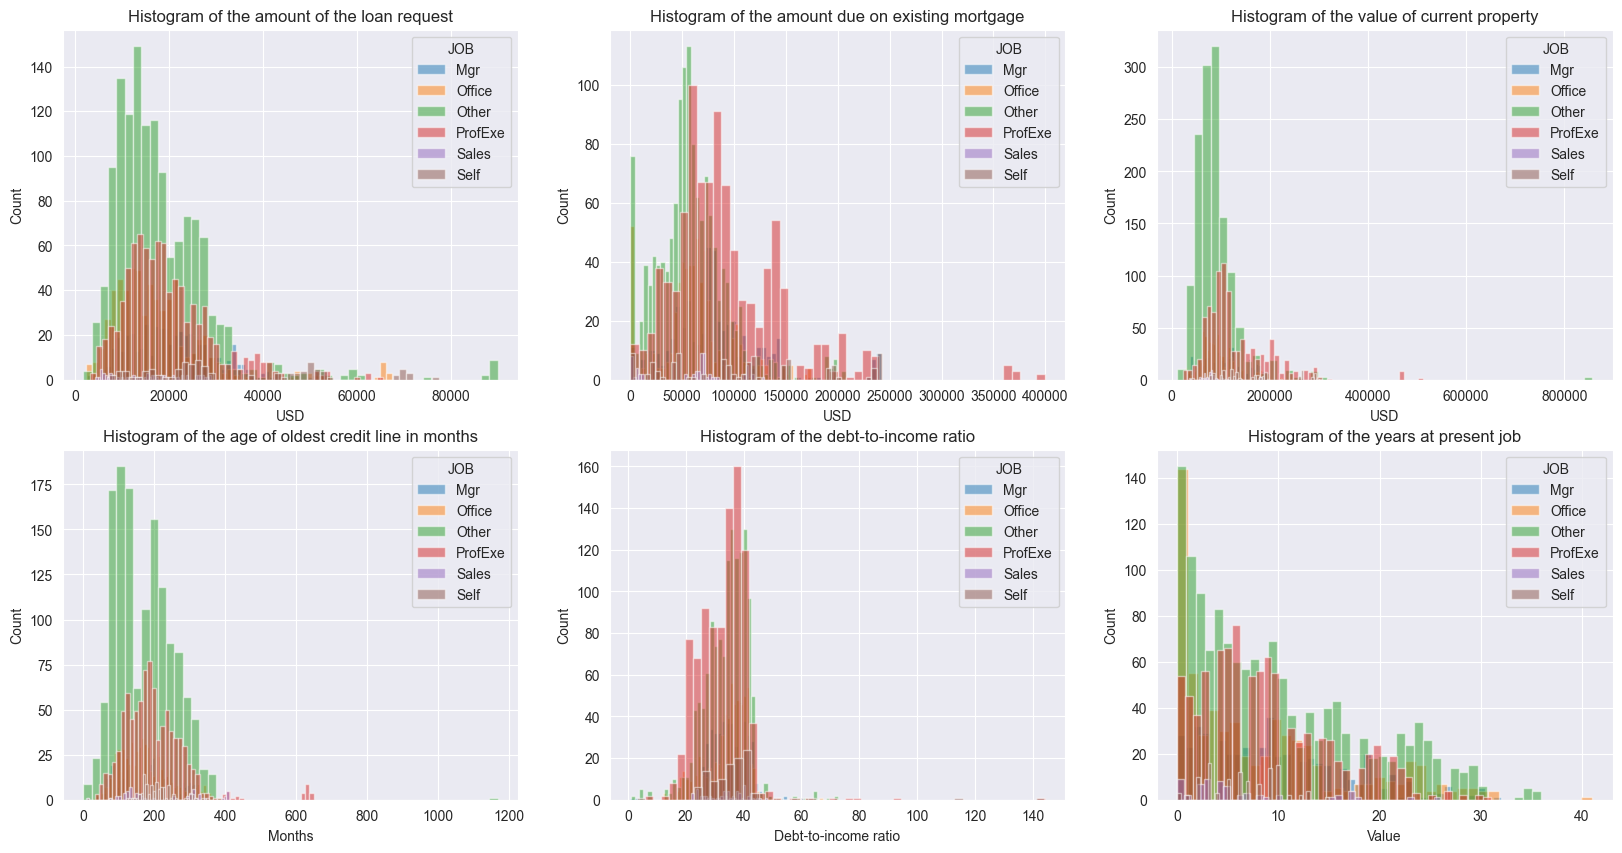

In [233]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for job, dd in f.groupby('JOB'):
    axs[0, 0].hist(dd['LOAN'], 50, label=job, alpha=0.5)
    axs[0, 1].hist(dd['MORTDUE'], 50, label=job, alpha=0.5)
    axs[0, 2].hist(dd['VALUE'], 50, label=job, alpha=0.5)
    axs[1, 0].hist(dd['CLAGE'], 50, label=job, alpha=0.5)
    axs[1, 1].hist(dd['DEBTINC'], 50, label=job, alpha=0.5)
    axs[1, 2].hist(dd['YOJ'], 40, label=job, alpha=0.5)

axs[0, 0].set_title('Histogram of the amount of the loan request')
axs[0, 0].set_xlabel('USD')
axs[0, 0].set_ylabel('Count')
axs[0, 1].set_title('Histogram of the amount due on existing mortgage')
axs[0, 1].set_xlabel('USD')
axs[0, 1].set_ylabel('Count')
axs[0, 2].set_title('Histogram of the value of current property')
axs[0, 2].set_xlabel('USD')
axs[0, 2].set_ylabel('Count')
axs[1, 0].set_title('Histogram of the age of oldest credit line in months')
axs[1, 0].set_xlabel('Months')
axs[1, 0].set_ylabel('Count')
axs[1, 1].set_title('Histogram of the debt-to-income ratio')
axs[1, 1].set_xlabel('Debt-to-income ratio')
axs[1, 1].set_ylabel('Count')
axs[1, 2].set_title('Histogram of the years at present job')
axs[1, 2].set_xlabel('Value')
axs[1, 2].set_ylabel('Count')

for ax in axs.flat:
    ax.legend(title="JOB")

plt.show()

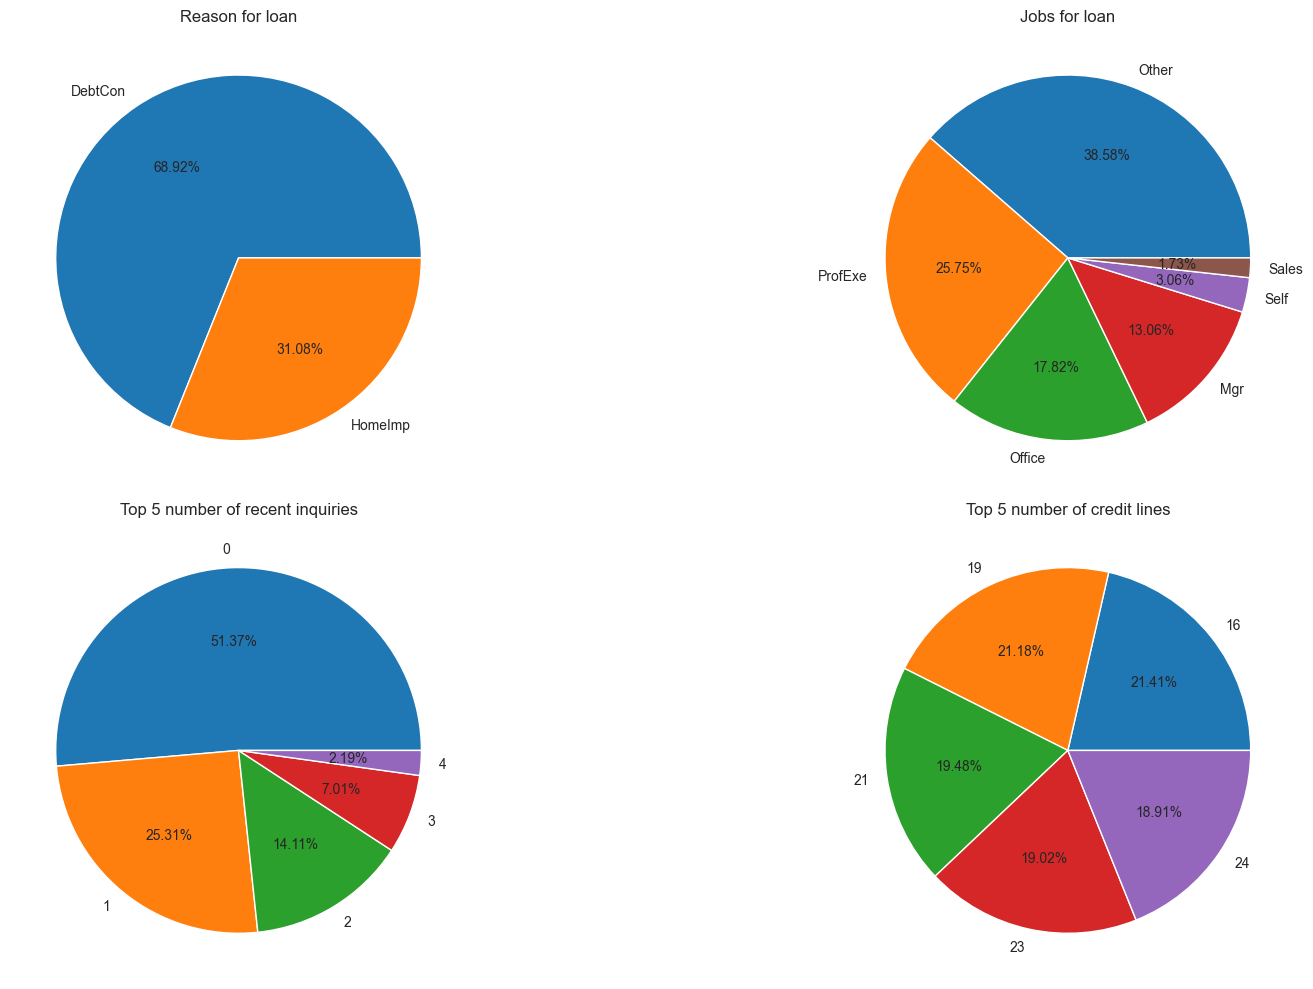

In [234]:
# plt.pie(f['REASON'])


fig, axs = plt.subplots(2, 2, figsize=(20, 10))

c = f['REASON'].value_counts()
axs[0, 0].pie(c, labels=c.index, autopct='%.2f%%')
axs[0, 0].set_title('Reason for loan')

c = f['JOB'].value_counts()
axs[0, 1].pie(c, labels=c.index, autopct='%.2f%%')
axs[0, 1].set_title('Jobs for loan')

c = f['NINQ'].value_counts().sort_values(ascending=False).head(5)
axs[1, 0].pie(c, labels=c.index, autopct='%.2f%%')
axs[1, 0].set_title('Top 5 number of recent inquiries')

c = f['CLNO'].value_counts().sort_values(ascending=False).head(5)
axs[1, 1].pie(c, labels=c.index, autopct='%.2f%%')
axs[1, 1].set_title('Top 5 number of credit lines')

plt.tight_layout()
plt.show()

In [235]:
f

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,True,1700,30548,40320,HomeImp,Other,9,0,0,101.466002,1,8,37.113614
7,True,1800,28502,43034,HomeImp,Other,11,0,0,88.766030,0,8,36.884894
19,False,2300,102370,120953,HomeImp,Office,2,0,0,90.992533,0,13,31.588503
25,True,2400,34863,47471,HomeImp,Mgr,12,0,0,70.491080,1,21,38.263601
26,False,2400,98449,117195,HomeImp,Office,4,0,0,93.811775,0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,88900,57264,90185,DebtCon,Other,16,0,0,221.808718,0,16,36.112347
5956,False,89000,54576,92937,DebtCon,Other,16,0,0,208.692070,0,15,35.859971
5957,False,89200,54045,92924,DebtCon,Other,15,0,0,212.279697,0,15,35.556590
5958,False,89800,50370,91861,DebtCon,Other,14,0,0,213.892709,0,16,34.340882


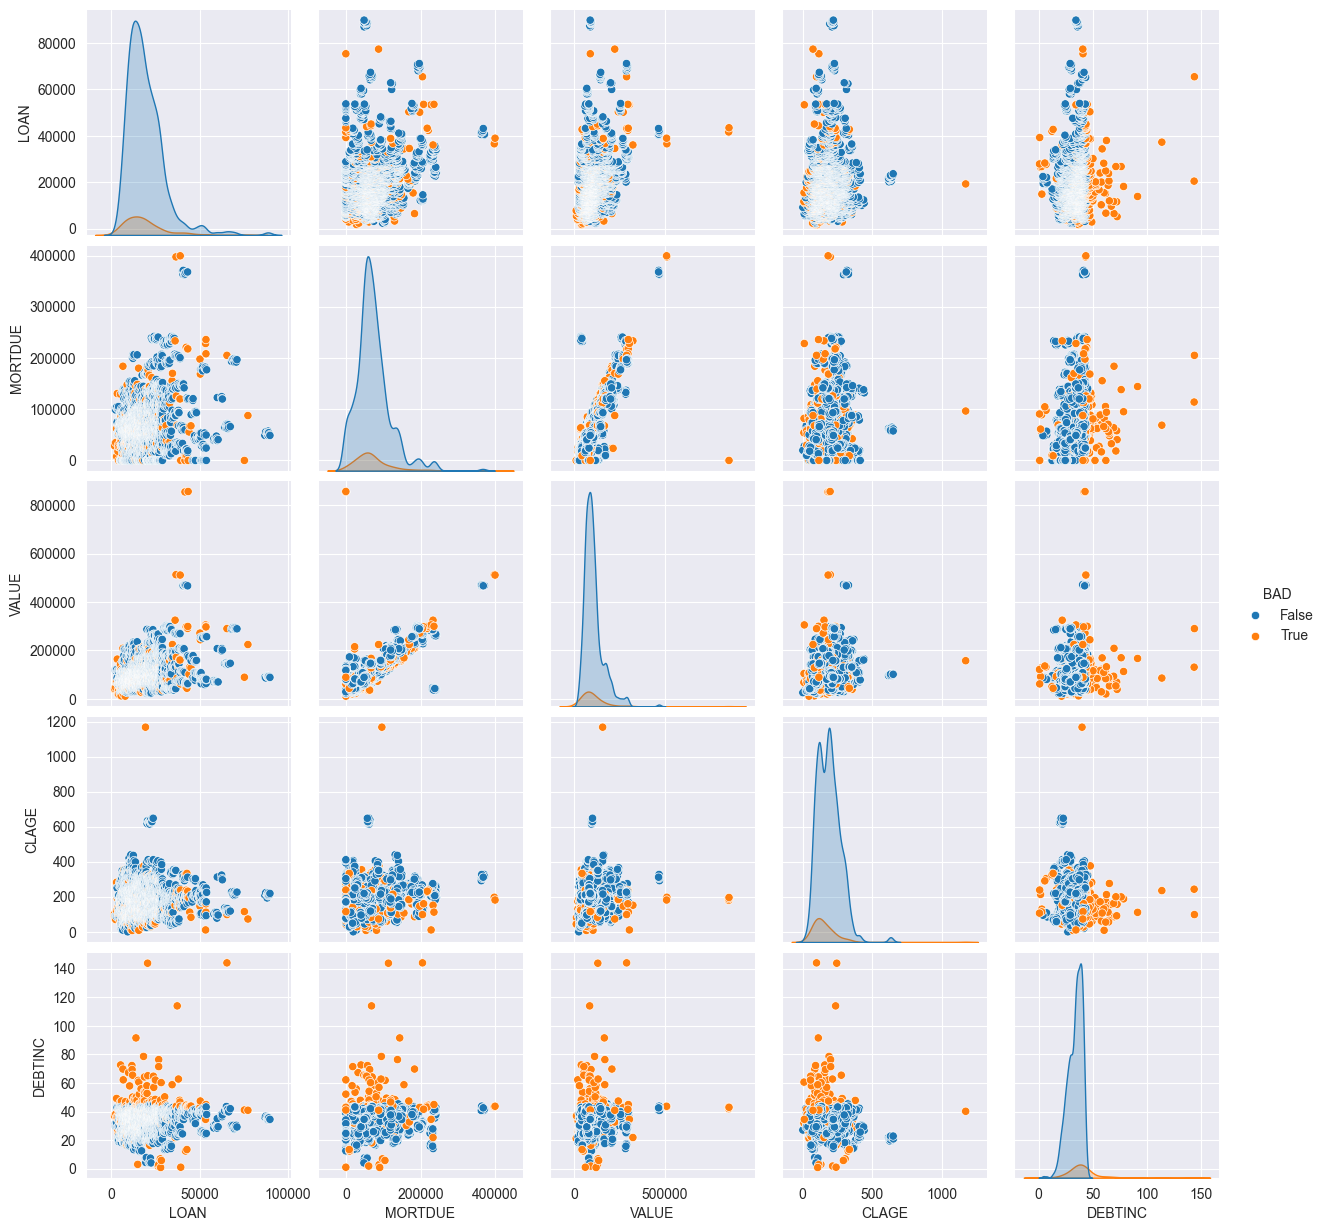

In [236]:
import seaborn as sns

# Pairpot numerical features and group by target

sns.pairplot(data=f[["LOAN", "MORTDUE", "VALUE", "CLAGE", "DEBTINC", "BAD"]], hue="BAD")
plt.show()

### Train model
Using the transformed dataset

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = f[["LOAN","MORTDUE","VALUE","REASON","JOB","YOJ","DEROG","CLAGE","NINQ","CLNO","DEBTINC"]].copy()

y = f["BAD"]

reason_encoder = LabelEncoder()
reason_encoder.fit(X['REASON'])

X['REASON'] = reason_encoder.transform(X['REASON'])

job_encoder = LabelEncoder()
job_encoder.fit(X['JOB'])

X['JOB'] = job_encoder.transform(X['JOB'])

classifier = RandomForestClassifier(n_estimators=150, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)


0.9524348810872028

## Save final data in a db

In [238]:
import sqlite3

con = sqlite3.connect('../project.db')
cur = con.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS hmeq(
    loan INT NOT NULL,
    mortdue INT NOT NULL,
    value_ INT NOT NULL,
    reason INT NOT NULL,
    job INT NOT NULL,
    yoj INT NOT NULL,
    derog INT NOT NULL,
    clage FLOAT NOT NULL,
    ninq INT NOT NULL,
    clno INT NOT NULL,
    debtinc INT NOT NULL,
    label INT NOT NULL
);
""")

for (idx, row), label in zip(X.iterrows(), y):
    cur.execute("""
    INSERT INTO hmeq (loan, mortdue,value_,reason,job,yoj,derog,clage,ninq,clno,debtinc,label)
    VALUES (?,?,?,?,?,?,?,?,?,?,?,?)
    """, [
        row['LOAN'],
        row['MORTDUE'],
        row['VALUE'],
        row['REASON'],
        row['JOB'],
        row['YOJ'],
        row['DEROG'],
        row['CLAGE'],
        row['NINQ'],
        row['CLNO'],
        row['DEBTINC'],
        label
    ])

con.commit()
con.close()


## Pickle objects
Serialise classifier and encoders for usage with flask

In [239]:
import pickle

with open('pickled/classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)
    
with open('pickled/reason_encoder.pkl', 'wb') as f:
    pickle.dump(reason_encoder, f)
    
with open('pickled/job_encoder.pkl', 'wb') as f:
    pickle.dump(job_encoder, f)
